In [8]:
import numpy as np 
import pandas as pd 
from sklearn.neighbors import KNeighborsClassifier 
import matplotlib.pyplot as plt  

In [9]:
test_data = pd.read_csv('test.csv') 
train_data = pd.read_csv('train.csv')
test_data['PorchArea']  = test_data['OpenPorchSF'] + test_data['EnclosedPorch'] + test_data['3SsnPorch']
train_data['PorchArea'] = train_data['OpenPorchSF'] + train_data['EnclosedPorch'] + train_data['3SsnPorch']

In [10]:
train_data = train_data.loc[:, ['SalePrice', 'LotArea', 'OverallQual', 'OverallCond', 'GrLivArea', 'PorchArea']]

c:\Users\PRATUL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\PRATUL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\PRATUL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\PRATUL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\

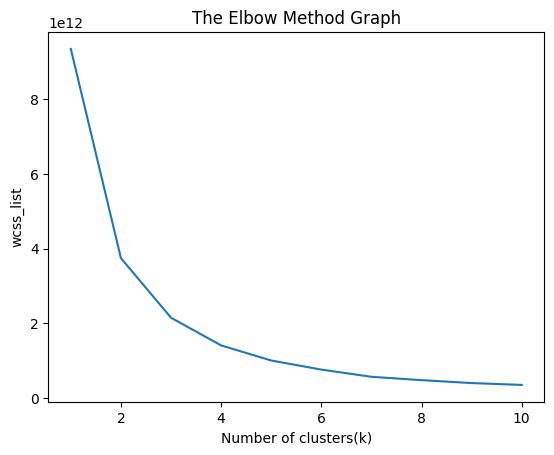

In [11]:
from sklearn.cluster import KMeans  
wcss_list= []

for i in range(1, 11):  
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)  
    kmeans.fit(train_data)  
    wcss_list.append(kmeans.inertia_)  
plt.plot(range(1, 11), wcss_list)  
plt.title('The Elbow Method Graph')  
plt.xlabel('Number of clusters(k)')  
plt.ylabel('wcss_list')  
plt.show() 

In [12]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state= 42)  
y_predict= kmeans.fit_predict(train_data)  

c:\Users\PRATUL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [13]:
y0 = (y_predict == 0)
y1 = (y_predict == 1)
y2 = (y_predict == 2)
y3 = (y_predict == 3)

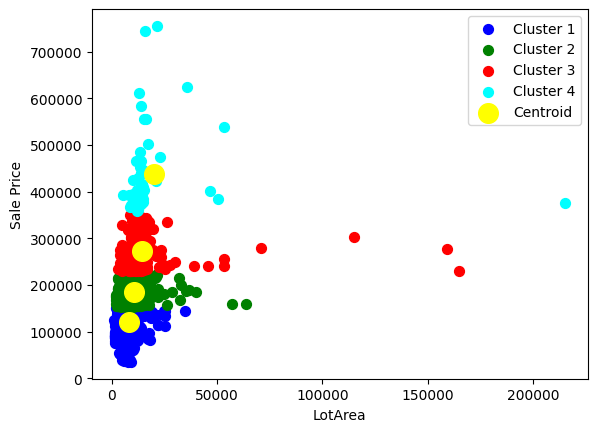

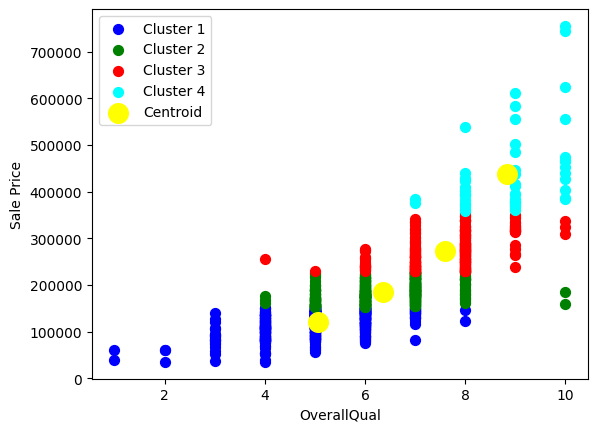

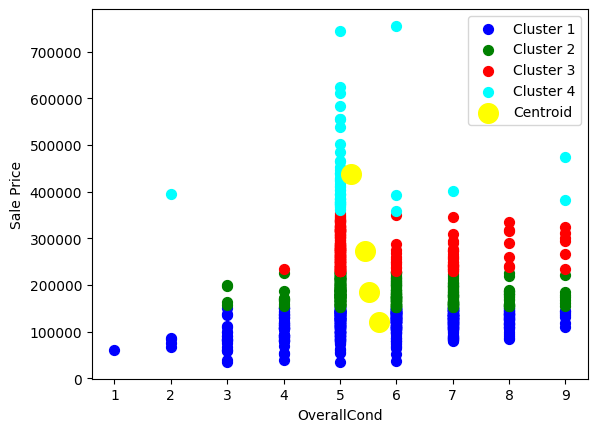

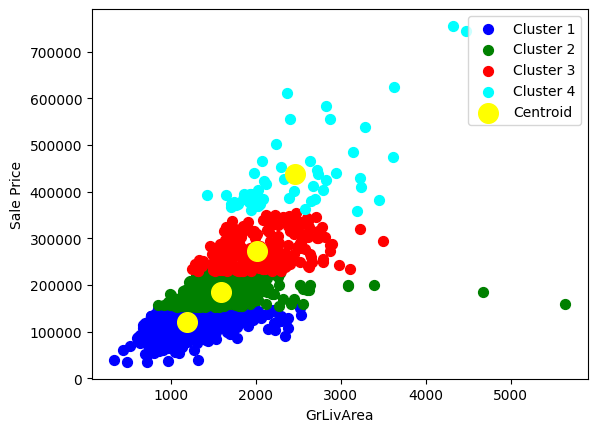

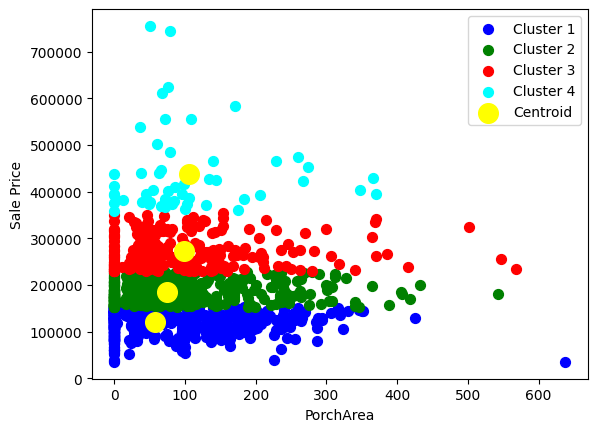

In [14]:
for i in range(1,6):
    plt.scatter(train_data.iloc[y0, i], train_data.loc[y0, 'SalePrice'], s = 50, c = 'blue', label = 'Cluster 1') #for first cluster  
    plt.scatter(train_data.iloc[y1, i], train_data.loc[y1, 'SalePrice'], s = 50, c = 'green', label = 'Cluster 2') #for second cluster  
    plt.scatter(train_data.iloc[y2, i], train_data.loc[y2, 'SalePrice'], s = 50, c = 'red', label = 'Cluster 3') #for third cluster  
    plt.scatter(train_data.iloc[y3, i], train_data.loc[y3, 'SalePrice'], s = 50, c = 'cyan', label = 'Cluster 4') #for fourth cluster  
    plt.scatter(kmeans.cluster_centers_[:, i], kmeans.cluster_centers_[:, 0], s = 200, c = 'yellow', label = 'Centroid')  
    plt.xlabel(train_data.columns[i])
    plt.ylabel('Sale Price')  
    plt.legend()  
    plt.show()  